# Comparing SVM Kernels performance using Letter Recognition Dataset

## Objective - Letter Recognition using SVM

The objective is to identify each of a large number of black-and-white rectangular pixel displays as one of the 26 capital letters in the English alphabet. The character images were based on 20 different fonts and each letter within these 20 fonts was randomly distorted to produce a file of 20,000 unique stimuli. Each stimulus was converted into 16 primitive numerical attributes (statistical moments and edge counts) which were then scaled to fit into a range of integer values from 0 through 15.

## About the Dataset

The Dataset was obtained from the UCI Machine Learning Repository(https://archive.ics.uci.edu/ml/datasets/letter+recognition)

Each row in the data set represents an image of a handwritten alphabet, as shown in figure 1(A). Using some basic image processing, the images are converted into m X n pixels (figure 1(B)), where m and n depend on the size and resolution of the original image. Each pixel contains numeric values, with higher values denoting the presence of dense 'ink'. In the pixels where nothing is written, the pixel value is 0.

A pixel is called 'on' if it contains to a positive numeric value, else it is called 'off'.

Using the pixelated images, 16 features are derived for each image, such as the width of the box, the ratio of the mean variance of x divided by the width of the box, etc.

![title](letter.png)

## Attribute Information:

1. lettr capital letter (26 values from A to Z)
2. x-box horizontal position of box (integer)
3. y-box vertical position of box (integer)
4. width width of box (integer)
5. high height of box (integer)
6. onpix total # on pixels (integer)
7. x-bar mean x of on pixels in box (integer)
8. y-bar mean y of on pixels in box (integer)
9. x2bar mean x variance (integer)
10. y2bar mean y variance (integer)
11. xybar mean x y correlation (integer)
12. x2ybr mean of x * x * y (integer)
13. xy2br mean of x * y * y (integer)
14. x-ege mean edge count left to right (integer)
15. xegvy correlation of x-ege with y (integer)
16. y-ege mean edge count bottom to top (integer)
17. yegvx correlation of y-ege with x (integer)

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

### Read Data

In [2]:
df = pd.read_csv('letter-recognition.csv')
df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [3]:
df.shape

(20000, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [5]:
df.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


### Preprocessing and Visualization of Data

In [6]:
#Average features of all letters

df_means = df.groupby('letter').mean()
df_means

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
letter,,,,,,,,,,,,,,,,
A,3.337136,6.975919,5.128010,5.178707,2.991128,8.851711,3.631179,2.755387,2.043093,7.802281,2.338403,8.465146,2.771863,6.321926,2.875792,7.468948
B,3.985640,6.962141,5.088773,5.169713,4.596606,7.671018,7.062663,5.366841,5.571802,7.954308,5.506527,6.652742,3.117493,7.919060,6.612272,9.100522
C,4.031250,7.063859,4.701087,5.296196,2.775815,5.437500,7.627717,5.927989,7.177989,8.773098,7.494565,11.947011,1.991848,8.876359,4.080163,8.555707
D,4.023602,7.244720,5.170186,5.288199,4.026087,7.539130,6.806211,5.921739,6.508075,8.166460,5.111801,5.750311,3.365217,7.813665,3.971429,7.628571
E,3.727865,6.944010,4.756510,5.201823,3.679688,5.966146,7.352865,4.223958,7.585938,8.507812,6.242188,10.341146,2.127604,8.298177,6.022135,8.506510
F,3.832258,7.009032,4.898065,5.209032,3.178065,4.913548,10.454194,3.476129,4.886452,11.242581,7.830968,5.723871,1.736774,9.117419,3.321290,6.712258
G,4.086675,6.988357,4.988357,5.282018,3.566624,6.866753,6.586028,5.966365,5.337646,7.429495,6.157827,9.586028,2.833118,8.369987,5.146184,9.216041
H,4.331063,6.844687,5.784741,5.193460,4.253406,7.344687,7.320163,6.702997,4.280654,8.044959,5.899183,7.801090,3.862398,8.047684,3.095368,7.858311
I,2.270199,6.980132,2.631788,5.209272,1.825166,7.458278,7.035762,1.940397,5.973510,9.476821,5.797351,7.649007,0.537748,8.066225,2.141722,7.931126


In [7]:
#Ordered Letters

order = list(np.sort(df_means.index.unique()))
print(order)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


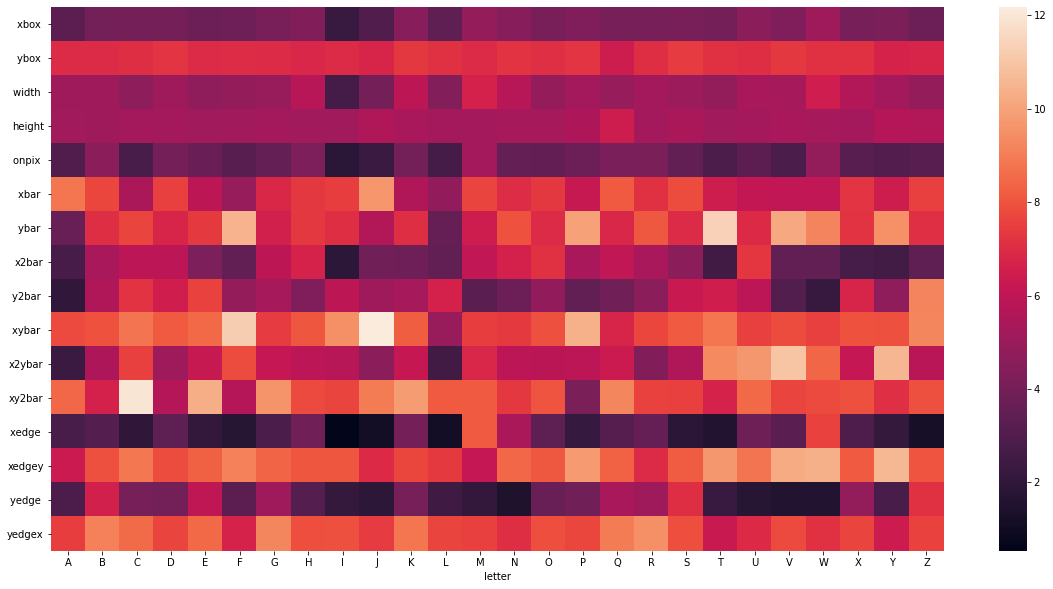

In [8]:
#Plotting average features of all letters

plt.figure(figsize=(20, 10))
sns.heatmap(df_means.T)

### Input and Target Data

In [9]:
#Input Data

X = df.drop('letter', axis = 1)
X.head()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [10]:
#Target Column

y = df['letter']
y.head()

0    T
1    I
2    D
3    N
4    G
Name: letter, dtype: object

### Scaling Data

In [11]:
#Scaling the Data

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

### Splitting Data into Test and Train

In [12]:
# Spliting the dataset into train-test

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.75,test_size=0.25,random_state=41)

### Support Vector Machine

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

Support Vector Classifier or SVC is capable of classification using multiple kernels (different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.)

In [13]:
col_names =  ['Kernel Name', 'Accuracy']   
acc  = pd.DataFrame(columns = col_names)

In [14]:
def valuation(name, y_test, y_pred):
    
    #Model Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy of "+ name + " is: "+ str(accuracy))
    
    acc.loc[len(acc.index)] = [name, accuracy]  
    
    #Confusion Matrix
    print("\nConfusion Matrix:")
    cnf = metrics.confusion_matrix(y_true = y_test,y_pred = y_pred)
    return(cnf)

### Support Vector Classification using inbuilt Kernels

SVM provides four inbuilt kernels for classification: ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’ ('rbf' as default)

#### 1. Linear Kernel

In [15]:
# Building a linear SVM model
svm_linear = SVC(kernel='linear',probability=True)
svm_linear.fit(X_train,y_train)

y_pred = svm_linear.predict(X_test)

valuation('svm_linear', y_test, y_pred)

Accuracy of svm_linear is: 0.8496

Confusion Matrix:


array([[195,   0,   0,   0,   0,   0,   2,   0,   0,   0,   2,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,   0],
       [  1, 157,   0,   3,   2,   0,   3,   1,   1,   0,   1,   0,   0,
          1,   0,   1,   0,  11,   3,   0,   0,   1,   0,   1,   0,   0],
       [  0,   0, 141,   0,   7,   0,   5,   1,   0,   0,   3,   0,   0,
          0,   1,   0,   0,   0,   0,   1,   2,   0,   0,   1,   0,   0],
       [  3,  13,   0, 172,   0,   0,   0,   4,   0,   1,   2,   0,   0,
          3,   4,   2,   0,   3,   0,   1,   3,   0,   0,   0,   0,   0],
       [  0,   2,   1,   0, 164,   2,   8,   0,   0,   0,   0,   1,   0,
          0,   0,   1,   3,   3,   3,   5,   0,   0,   0,   2,   0,   0],
       [  0,   2,   0,   2,   6, 179,   2,   1,   0,   0,   0,   0,   0,
          0,   0,   2,   0,   0,   5,   7,   0,   0,   0,   0,   1,   0],
       [  1,   0,   9,   5,   3,   3, 144,   0,   0,   0,   4,   1,   1,
          0,   1,   0,   9,   3,  10,   0,   

#### 2. RBF Kernel

In [16]:
# Building a gaussian SVM model
svm_gaussian = SVC(kernel='rbf',probability=True)
svm_gaussian.fit(X_train,y_train)

y_pred = svm_gaussian.predict(X_test)

valuation('svm_gaussian', y_test, y_pred)

Accuracy of svm_gaussian is: 0.9454

Confusion Matrix:


array([[200,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0],
       [  0, 175,   0,   3,   2,   0,   1,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   6,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 151,   0,   5,   0,   4,   0,   0,   0,   0,   0,   0,
          0,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   8,   0, 195,   0,   0,   0,   5,   0,   0,   0,   0,   0,
          3,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   3,   1,   0, 180,   1,   6,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   1,   1,   0,   0,   0,   0,   0,   0,   0,   2],
       [  0,   1,   0,   0,   4, 196,   0,   0,   2,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   1,   2,   0,   0,   0,   1,   0,   0],
       [  0,   0,   0,   5,   0,   0, 191,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   

#### 3. Polynomial Kernel

In [17]:
# Building a Polynomial SVM model
svm_poly = SVC(kernel='poly',probability=True)
svm_poly.fit(X_train,y_train)

y_pred = svm_poly.predict(X_test)

valuation('svm_poly', y_test, y_pred)

Accuracy of svm_poly is: 0.8852

Confusion Matrix:


array([[194,   0,   0,   0,   0,   0,   0,   2,   0,   0,   0,   0,   0,
          0,   3,   0,   0,   1,   0,   0,   0,   0,   0,   1,   0,   0],
       [  0, 162,   0,   6,   1,   0,   2,   3,   0,   0,   0,   0,   0,
          0,   8,   0,   0,   4,   0,   0,   0,   0,   0,   1,   0,   0],
       [  0,   0, 137,   0,   5,   0,   5,   1,   0,   0,   0,   0,   0,
          0,  12,   0,   0,   0,   0,   0,   0,   0,   0,   2,   0,   0],
       [  1,   9,   0, 184,   0,   0,   0,   3,   0,   0,   0,   0,   0,
          4,   8,   0,   0,   0,   0,   0,   0,   0,   0,   2,   0,   0],
       [  0,   1,   2,   0, 177,   0,   7,   0,   0,   0,   0,   0,   0,
          0,   4,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0],
       [  0,   1,   0,   1,   4, 188,   0,   1,   0,   0,   0,   0,   0,
          0,   2,   0,   0,   0,   4,   3,   0,   0,   0,   2,   0,   1],
       [  0,   0,   2,   2,   1,   0, 170,   0,   0,   0,   1,   0,   0,
          0,  20,   0,   1,   1,   0,   0,   

#### 4. Sigmoid Kernel

In [18]:
# Building a Sigmoid SVM model
svm_sigmoid = SVC(kernel='sigmoid',probability=True)
svm_sigmoid.fit(X_train,y_train)

y_pred = svm_sigmoid.predict(X_test)

valuation('svm_sigmoid', y_test, y_pred)

Accuracy of svm_sigmoid is: 0.4804

Confusion Matrix:


array([[153,   0,   0,   1,   0,   0,   0,   3,   0,  19,   3,   6,   5,
          0,   2,   0,   0,   1,   1,   0,   0,   0,   4,   0,   3,   0],
       [  3, 109,   0,   3,   0,   0,   5,   8,  16,   6,   3,   1,   4,
          0,   0,   4,   6,  10,   4,   0,   0,   0,   4,   0,   0,   1],
       [  0,   0,  98,   0,  27,   2,   5,   3,   0,   0,  10,   2,   1,
          0,   0,   0,   1,   0,   2,   4,   0,   0,   7,   0,   0,   0],
       [  8,  15,   0, 103,   0,   0,   1,  17,   7,  25,   1,   9,   4,
          0,   3,   6,   0,   1,   7,   1,   0,   0,   0,   1,   0,   2],
       [  0,   7,  35,   0,  87,   0,   3,   0,   5,   2,   4,  13,   1,
          0,   0,   0,  10,   3,   7,   7,   2,   0,   2,   2,   2,   3],
       [  0,  13,   0,   3,   2,  96,   6,   3,   1,   2,   0,   0,   0,
          0,   0,  25,   1,   5,   7,  37,   0,   1,   5,   0,   0,   0],
       [ 11,   1,  42,   1,   3,   2,  53,   5,   1,   1,   4,  20,   9,
          0,   2,   0,  14,   8,  12,   0,   

### SVC using PyKernels

PyKernels is a python library for working with kernel methods in machine learning. It provides implementations of various kernel functions ranging from typical linear, polynomial or rbf ones through wawelet, fourier transformations, kernels for binary sequences and even kernels for labeled graphs.

Below we will go through some of the other SVM kernels.

#### 5. Cossim Kernel

In [19]:
# Building a cossim SVM model
from pykernels.regular import Cossim

svm_cos = SVC(kernel = Cossim(),probability=True)
svm_cos.fit(X_train,y_train)

y_pred = svm_cos.predict(X_test)

valuation('svm_cos', y_test, y_pred)

Accuracy of svm_cos is: 0.4804

Confusion Matrix:


array([[153,   0,   0,   1,   0,   0,   0,   3,   0,  19,   3,   6,   5,
          0,   2,   0,   0,   1,   1,   0,   0,   0,   4,   0,   3,   0],
       [  3, 109,   0,   3,   0,   0,   5,   8,  16,   6,   3,   1,   4,
          0,   0,   4,   6,  10,   4,   0,   0,   0,   4,   0,   0,   1],
       [  0,   0,  98,   0,  27,   2,   5,   3,   0,   0,  10,   2,   1,
          0,   0,   0,   1,   0,   2,   4,   0,   0,   7,   0,   0,   0],
       [  8,  15,   0, 103,   0,   0,   1,  17,   7,  25,   1,   9,   4,
          0,   3,   6,   0,   1,   7,   1,   0,   0,   0,   1,   0,   2],
       [  0,   7,  35,   0,  87,   0,   3,   0,   5,   2,   4,  13,   1,
          0,   0,   0,  10,   3,   7,   7,   2,   0,   2,   2,   2,   3],
       [  0,  13,   0,   3,   2,  96,   6,   3,   1,   2,   0,   0,   0,
          0,   0,  25,   1,   5,   7,  37,   0,   1,   5,   0,   0,   0],
       [ 11,   1,  42,   1,   3,   2,  53,   5,   1,   1,   4,  20,   9,
          0,   2,   0,  14,   8,  12,   0,   

#### 6. InverseMultiquadratic Kernel

In [20]:
# Building a InverseMultiquadratic SVM model
from pykernels.regular import InverseMultiquadratic

svm_mul = SVC(kernel = InverseMultiquadratic(),probability=True)
svm_mul.fit(X_train,y_train)

y_pred = svm_mul.predict(X_test)

valuation('svm_mul', y_test, y_pred)

Accuracy of svm_mul is: 0.4804

Confusion Matrix:


array([[153,   0,   0,   1,   0,   0,   0,   3,   0,  19,   3,   6,   5,
          0,   2,   0,   0,   1,   1,   0,   0,   0,   4,   0,   3,   0],
       [  3, 109,   0,   3,   0,   0,   5,   8,  16,   6,   3,   1,   4,
          0,   0,   4,   6,  10,   4,   0,   0,   0,   4,   0,   0,   1],
       [  0,   0,  98,   0,  27,   2,   5,   3,   0,   0,  10,   2,   1,
          0,   0,   0,   1,   0,   2,   4,   0,   0,   7,   0,   0,   0],
       [  8,  15,   0, 103,   0,   0,   1,  17,   7,  25,   1,   9,   4,
          0,   3,   6,   0,   1,   7,   1,   0,   0,   0,   1,   0,   2],
       [  0,   7,  35,   0,  87,   0,   3,   0,   5,   2,   4,  13,   1,
          0,   0,   0,  10,   3,   7,   7,   2,   0,   2,   2,   2,   3],
       [  0,  13,   0,   3,   2,  96,   6,   3,   1,   2,   0,   0,   0,
          0,   0,  25,   1,   5,   7,  37,   0,   1,   5,   0,   0,   0],
       [ 11,   1,  42,   1,   3,   2,  53,   5,   1,   1,   4,  20,   9,
          0,   2,   0,  14,   8,  12,   0,   

#### 7. Laplacian Kernel

In [21]:
# Building a Laplacian SVM model
from pykernels.regular import Laplacian

svm_lap = SVC(kernel = Laplacian(),probability=True)
svm_lap.fit(X_train,y_train)

y_pred = svm_lap.predict(X_test)

valuation('svm_lap', y_test, y_pred)

Accuracy of svm_lap is: 0.4804

Confusion Matrix:


array([[153,   0,   0,   1,   0,   0,   0,   3,   0,  19,   3,   6,   5,
          0,   2,   0,   0,   1,   1,   0,   0,   0,   4,   0,   3,   0],
       [  3, 109,   0,   3,   0,   0,   5,   8,  16,   6,   3,   1,   4,
          0,   0,   4,   6,  10,   4,   0,   0,   0,   4,   0,   0,   1],
       [  0,   0,  98,   0,  27,   2,   5,   3,   0,   0,  10,   2,   1,
          0,   0,   0,   1,   0,   2,   4,   0,   0,   7,   0,   0,   0],
       [  8,  15,   0, 103,   0,   0,   1,  17,   7,  25,   1,   9,   4,
          0,   3,   6,   0,   1,   7,   1,   0,   0,   0,   1,   0,   2],
       [  0,   7,  35,   0,  87,   0,   3,   0,   5,   2,   4,  13,   1,
          0,   0,   0,  10,   3,   7,   7,   2,   0,   2,   2,   2,   3],
       [  0,  13,   0,   3,   2,  96,   6,   3,   1,   2,   0,   0,   0,
          0,   0,  25,   1,   5,   7,  37,   0,   1,   5,   0,   0,   0],
       [ 11,   1,  42,   1,   3,   2,  53,   5,   1,   1,   4,  20,   9,
          0,   2,   0,  14,   8,  12,   0,   

#### 8. Log Kernel

In [22]:
# Building a Log SVM model
from pykernels.regular import Log

svm_log= SVC(kernel = Log(),probability=True)
svm_log.fit(X_train,y_train)
y_pred = svm_log.predict(X_test)

valuation('svm_log', y_test, y_pred)

Accuracy of svm_log is: 0.4804

Confusion Matrix:


array([[153,   0,   0,   1,   0,   0,   0,   3,   0,  19,   3,   6,   5,
          0,   2,   0,   0,   1,   1,   0,   0,   0,   4,   0,   3,   0],
       [  3, 109,   0,   3,   0,   0,   5,   8,  16,   6,   3,   1,   4,
          0,   0,   4,   6,  10,   4,   0,   0,   0,   4,   0,   0,   1],
       [  0,   0,  98,   0,  27,   2,   5,   3,   0,   0,  10,   2,   1,
          0,   0,   0,   1,   0,   2,   4,   0,   0,   7,   0,   0,   0],
       [  8,  15,   0, 103,   0,   0,   1,  17,   7,  25,   1,   9,   4,
          0,   3,   6,   0,   1,   7,   1,   0,   0,   0,   1,   0,   2],
       [  0,   7,  35,   0,  87,   0,   3,   0,   5,   2,   4,  13,   1,
          0,   0,   0,  10,   3,   7,   7,   2,   0,   2,   2,   2,   3],
       [  0,  13,   0,   3,   2,  96,   6,   3,   1,   2,   0,   0,   0,
          0,   0,  25,   1,   5,   7,  37,   0,   1,   5,   0,   0,   0],
       [ 11,   1,  42,   1,   3,   2,  53,   5,   1,   1,   4,  20,   9,
          0,   2,   0,  14,   8,  12,   0,   

#### 9. TStudent Kernel

In [23]:
# Building a TStudent SVM model
from pykernels.regular import TStudent

svm_tst = SVC(kernel = TStudent(),probability=True)
svm_tst.fit(X_train,y_train)

y_pred = svm_tst.predict(X_test)

valuation('svm_tst', y_test,y_pred)

Accuracy of svm_tst is: 0.9588

Confusion Matrix:


array([[153,   0,   0,   1,   0,   0,   0,   3,   0,  19,   3,   6,   5,
          0,   2,   0,   0,   1,   1,   0,   0,   0,   4,   0,   3,   0],
       [  3, 109,   0,   3,   0,   0,   5,   8,  16,   6,   3,   1,   4,
          0,   0,   4,   6,  10,   4,   0,   0,   0,   4,   0,   0,   1],
       [  0,   0,  98,   0,  27,   2,   5,   3,   0,   0,  10,   2,   1,
          0,   0,   0,   1,   0,   2,   4,   0,   0,   7,   0,   0,   0],
       [  8,  15,   0, 103,   0,   0,   1,  17,   7,  25,   1,   9,   4,
          0,   3,   6,   0,   1,   7,   1,   0,   0,   0,   1,   0,   2],
       [  0,   7,  35,   0,  87,   0,   3,   0,   5,   2,   4,  13,   1,
          0,   0,   0,  10,   3,   7,   7,   2,   0,   2,   2,   2,   3],
       [  0,  13,   0,   3,   2,  96,   6,   3,   1,   2,   0,   0,   0,
          0,   0,  25,   1,   5,   7,  37,   0,   1,   5,   0,   0,   0],
       [ 11,   1,  42,   1,   3,   2,  53,   5,   1,   1,   4,  20,   9,
          0,   2,   0,  14,   8,  12,   0,   

#### 10. ANOVA Kernel

In [24]:
# Building a ANOVA SVM model
from pykernels.regular import ANOVA

svm_anova = SVC(kernel = ANOVA(),probability=True)
svm_anova.fit(X_train,y_train)

y_pred = svm_anova.predict(X_test)

valuation('svm_anova', y_test,y_pred)

Accuracy of svm_anova is: 0.9224

Confusion Matrix:


array([[153,   0,   0,   1,   0,   0,   0,   3,   0,  19,   3,   6,   5,
          0,   2,   0,   0,   1,   1,   0,   0,   0,   4,   0,   3,   0],
       [  3, 109,   0,   3,   0,   0,   5,   8,  16,   6,   3,   1,   4,
          0,   0,   4,   6,  10,   4,   0,   0,   0,   4,   0,   0,   1],
       [  0,   0,  98,   0,  27,   2,   5,   3,   0,   0,  10,   2,   1,
          0,   0,   0,   1,   0,   2,   4,   0,   0,   7,   0,   0,   0],
       [  8,  15,   0, 103,   0,   0,   1,  17,   7,  25,   1,   9,   4,
          0,   3,   6,   0,   1,   7,   1,   0,   0,   0,   1,   0,   2],
       [  0,   7,  35,   0,  87,   0,   3,   0,   5,   2,   4,  13,   1,
          0,   0,   0,  10,   3,   7,   7,   2,   0,   2,   2,   2,   3],
       [  0,  13,   0,   3,   2,  96,   6,   3,   1,   2,   0,   0,   0,
          0,   0,  25,   1,   5,   7,  37,   0,   1,   5,   0,   0,   0],
       [ 11,   1,  42,   1,   3,   2,  53,   5,   1,   1,   4,  20,   9,
          0,   2,   0,  14,   8,  12,   0,   

### Comparing Accuracies of the Kernels

In [25]:
#Looking at Accuracies

print('Accuracy of all Kernels use')
acc

Accuracy of all Kernels use


,Kernel Name,Accuracy
0,svm_linear,0.8496
1,svm_gaussian,0.9454
2,svm_poly,0.8852
3,svm_sigmoid,0.4804
4,svm_cos,0.4804
5,svm_mul,0.4804
6,svm_lap,0.4804
7,svm_log,0.4804
8,svm_tst,0.9588
9,svm_anova,0.9224


In [26]:
#Sorted Accuracy

acc = acc.sort_values('Accuracy', ascending = False)
acc

,Kernel Name,Accuracy
8,svm_tst,0.9588
1,svm_gaussian,0.9454
9,svm_anova,0.9224
2,svm_poly,0.8852
0,svm_linear,0.8496
3,svm_sigmoid,0.4804
4,svm_cos,0.4804
5,svm_mul,0.4804
6,svm_lap,0.4804
7,svm_log,0.4804


In [27]:
#Max Accuracy

acc.iloc[:1]

,Kernel Name,Accuracy
8,svm_tst,0.9588


In [28]:
#Min Accuracy

acc.iloc[-1:]

,Kernel Name,Accuracy
7,svm_log,0.4804


In [29]:
#Top 4 Accuracies

acc.iloc[:4]

,Kernel Name,Accuracy
8,svm_tst,0.9588
1,svm_gaussian,0.9454
9,svm_anova,0.9224
2,svm_poly,0.8852


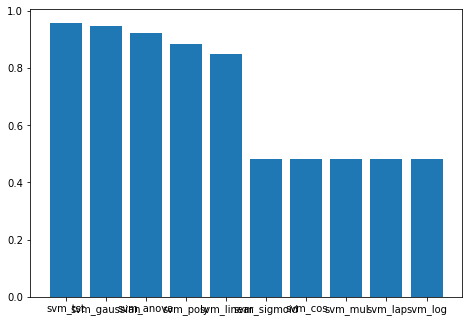

In [30]:
import matplotlib.pyplot as plt
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.bar(acc['Kernel Name'], acc['Accuracy'])
plt.show()